Python imports

In [2]:
import xarray as xr
from rio_tiler.io import XarrayReader
import matplotlib.pyplot as plt
import s3fs

Demo

In [3]:
demo_ds = xr.open_dataset(
    "https://pangeo.blob.core.windows.net/pangeo-public/daymet-rio-tiler/na-wgs84.zarr/",
    engine="zarr",
    decode_coords="all",
    consolidated=True,
)

In [4]:
demo_ds

<xarray.Dataset>
Dimensions:                  (time: 1, y: 3728, x: 17268)
Coordinates:
    lambert_conformal_conic  int64 ...
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Data variables:
    tmax                     (time, y, x) float32 ...
Attributes:
    Conventions:       CF-1.6
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        1980

In [5]:
demo_da = demo_ds["tmax"]
demo_da

<xarray.DataArray 'tmax' (time: 1, y: 3728, x: 17268)>
[64375104 values with dtype=float32]
Coordinates:
    lambert_conformal_conic  int64 ...
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Attributes:
    cell_methods:  area: mean time: maximum within days time: mean over days
    coordinates:   lon lat
    long_name:     annual average of daily maximum temperature
    units:         degrees C

In [6]:
with XarrayReader(demo_da) as dstx:
    imgx = dstx.tile(1, 1, 2)

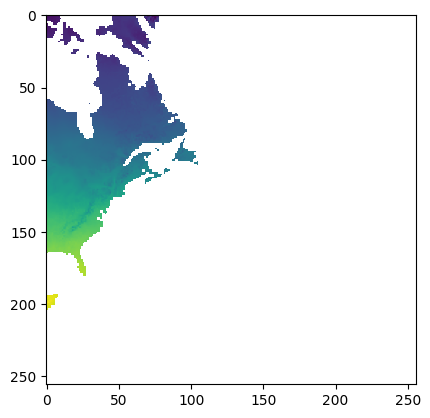

In [7]:
plt.imshow(imgx.data_as_image())

# IMOS SST

In [3]:
store_path = 's3://imos-data-pixeldrill/vhnguyen/playground/multi-years/'
data = xr.open_dataset(
    store_path,
    engine="zarr",
    decode_coords="all")
data

<xarray.Dataset>
Dimensions:                  (time: 11085, lat: 4500, lon: 6000)
Coordinates:
  * lat                      (lat) float32 19.99 19.97 19.95 ... -69.97 -69.99
  * lon                      (lon) float32 70.01 70.03 70.05 ... 190.0 190.0
  * time                     (time) datetime64[ns] 1992-03-21T03:20:00 ... 20...
Data variables:
    dt_analysis              (time, lat, lon) float32 ...
    l2p_flags                (time, lat, lon) float32 ...
    quality_level            (time, lat, lon) float32 ...
    satellite_zenith_angle   (time, lat, lon) float32 ...
    sea_surface_temperature  (time, lat, lon) float32 ...
    sses_bias                (time, lat, lon) float32 ...
    sses_count               (time, lat, lon) float32 ...
    sses_standard_deviation  (time, lat, lon) float32 ...
    sst_dtime                (time, lat, lon) float64 ...
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20220925T024130Z
    time_coverage_start:        20220924T213154Z
    title:                      IMOS L3S Daytime gridded multiple-sensor mult...
    uuid:                       dbd00748-c24a-45fd-a837-4281884f3aa5
    westernmost_longitude:      70.01000213623047

In [15]:
from rio_tiler.colormap import cmap
from rio_tiler.io import Reader

# Get Colormap
# You can list available colormap names with `cmap.list()`
cm = cmap.list()
cm

['puor_r',
 'rdpu',
 'twilight_r',
 'summer',
 'gnuplot2',
 'rplumbo',
 'rainbow_r',
 'rdylbu',
 'accent_r',
 'set1_r',
 'twilight_shifted_r',
 'plasma',
 'prgn_r',
 'bone_r',
 'jet',
 'cividis_r',
 'piyg_r',
 'flag',
 'brg',
 'gist_earth',
 'puor',
 'plasma_r',
 'pastel2',
 'hot_r',
 'inferno',
 'pastel2_r',
 'piyg',
 'seismic_r',
 'binary_r',
 'spectral',
 'oranges',
 'set2_r',
 'winter',
 'twilight',
 'rdylgn',
 'ocean',
 'autumn_r',
 'pubu',
 'gnbu_r',
 'ylorrd',
 'gnuplot2_r',
 'greys',
 'brg_r',
 'wistia_r',
 'orrd',
 'purples',
 'bupu',
 'pastel1',
 'dark2_r',
 'ylgn',
 'viridis',
 'bupu_r',
 'ylorbr',
 'hsv_r',
 'rdgy',
 'copper',
 'magma_r',
 'gist_gray_r',
 'gist_stern',
 'bwr_r',
 'spring_r',
 'bugn',
 'terrain_r',
 'gist_gray',
 'ylgnbu',
 'brbg',
 'spectral_r',
 'blues_r',
 'pastel1_r',
 'cfastie',
 'paired',
 'tab20b',
 'terrain',
 'pink_r',
 'cubehelix_r',
 'set3_r',
 'gist_yarg_r',
 'cubehelix',
 'bwr',
 'hsv',
 'schwarzwald',
 'set2',
 'purples_r',
 'orrd_r',
 'ylorrd_

In [25]:
# yy = xx['sea_surface_temperature'][:1]
print(yy.min)

<bound method DataArrayAggregations.min of <xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 4500, lon: 6000)>
[27000000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 19.99 19.97 19.95 19.93 ... -69.95 -69.97 -69.99
  * lon      (lon) float32 70.01 70.03 70.05 70.07 ... 189.9 189.9 190.0 190.0
  * time     (time) datetime64[ns] 2011-06-17T03:20:00
Attributes:
    comment:        The skin temperature of the ocean at a depth of approxima...
    long_name:      sea surface skin temperature
    standard_name:  sea_surface_skin_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767>


In [32]:
da_surface_temp = data['sea_surface_temperature']
da_surface_temp = da_surface_temp[[7000]]
da_surface_temp
# Add CRS so rioxarray doens't complain.
da_surface_temp.rio.write_crs(4326, inplace=True)

print(da_surface_temp.max())

<xarray.DataArray 'sea_surface_temperature' ()>
array(306.21020508)
Coordinates:
    spatial_ref  int64 0


In [21]:
da_surface_temp.valid_max

32767

bounds=BoundingBox(left=70.00000213595068, bottom=-69.99999786350668, right=190.00000549344387, top=19.999999770855315) minzoom=1 maxzoom=5 band_metadata=[('b1', {'axis': 'T', 'comment': 'A typical reference time for data', 'long_name': 'reference time of sst file', 'standard_name': 'time'})] band_descriptions=[('b1', '2011-06-17T03:20:00.000000000')] dtype='float32' nodata_type='Nodata' colorinterp=None scale=None offset=None colormap=None attrs={'comment': 'The skin temperature of the ocean at a depth of approximately 10um', 'long_name': 'sea surface skin temperature', 'standard_name': 'sea_surface_skin_temperature', 'units': 'kelvin', 'valid_max': 32767, 'valid_min': -32767} width=6000 name='sea_surface_temperature' height=4500 count=1
nan
None
ImageData(data=array([[[      nan,       nan,       nan, ...,       nan, 300.2902 ,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
         300.0702 ],
        [      nan,       nan,       nan, ..., 

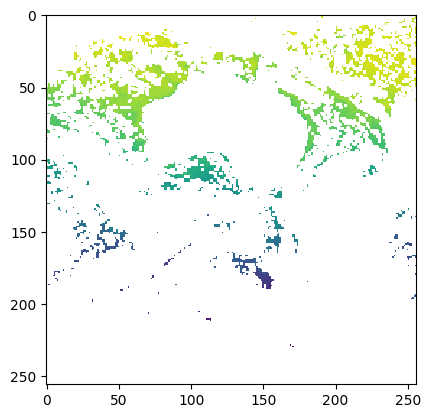

In [22]:

from matplotlib.pyplot import imshow
with XarrayReader(da_surface_temp) as dst:
    print(dst.info())
    img = dst.tile(3, 2, 2, tilesize=256)
    print(print(img.data.max()))
    print(img)
    imshow(img.data_as_image())

In [175]:
import mercantile
import rioxarray
import xarray as xr
import numpy as np


def clip_to_tile(tile: mercantile.Tile, ds: xr.DataArray):
    bounds = mercantile.xy_bounds(tile)
    wgs84_bounds = mercantile.bounds(tile)
    
    # Create source array by clipping the xarray dataset to extent of the tile.
    source_arr = ds.rio.clip_box(*wgs84_bounds)
    
    # Create the target array.
    x = np.linspace(bounds[0], bounds[2], 256)
    y = np.linspace(bounds[1], bounds[3], 256)
    
    return [x, y]
#     target_arr = xr.DataArray(
#         np.zeros((ds['time'].shape[0], 256, 256), ds.dtype),
#         [
#             ("time", ds['time'].data),
#             ("y", y),
#             ("x", x)
#         ]
#     )
#     target_arr.rio.write_crs(3857, inplace=True)
    
#     # Map source to target
#     matched = source_arr.rio.reproject_match(target_arr)
#     return matched

# Create a web mercator tile.
x = 1
y = 1
z = 1
tile = mercantile.tile(x, y, z)

arr = clip_to_tile(tile, da_surface_temp)
arr[0]

array([       0.        ,    78578.46408937,   157156.92817874,
         235735.39226811,   314313.85635748,   392892.32044685,
         471470.78453622,   550049.24862559,   628627.71271496,
         707206.17680433,   785784.6408937 ,   864363.10498307,
         942941.56907244,  1021520.0331618 ,  1100098.49725117,
        1178676.96134054,  1257255.42542991,  1335833.88951928,
        1414412.35360865,  1492990.81769802,  1571569.28178739,
        1650147.74587676,  1728726.20996613,  1807304.6740555 ,
        1885883.13814487,  1964461.60223424,  2043040.06632361,
        2121618.53041298,  2200196.99450235,  2278775.45859172,
        2357353.92268109,  2435932.38677046,  2514510.85085983,
        2593089.3149492 ,  2671667.77903857,  2750246.24312794,
        2828824.70721731,  2907403.17130667,  2985981.63539604,
        3064560.09948541,  3143138.56357478,  3221717.02766415,
        3300295.49175352,  3378873.95584289,  3457452.41993226,
        3536030.88402163,  3614609.34811

In [ ]:
with XarrayReader(src["prcp"][:1]) as dst:
    img = dst.tile(1, 1, 2)
    imshow(img.data_as_image())